In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from t1 import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


  0%|          | 0/1000000 [00:00<?, ?it/s]

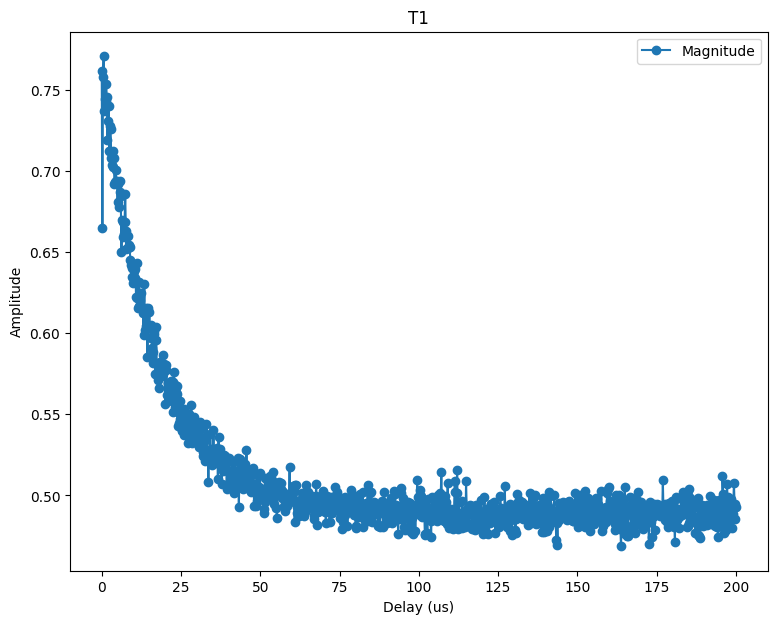

Creating directory G:\My Drive\chatot\data\t1\2025_05_26\04;57;14\
Data saved to G:\My Drive\chatot\data\t1\2025_05_26\04;57;14\data.h5
Config saved to G:\My Drive\chatot\data\t1\2025_05_26\04;57;14\cfg.json


In [4]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\t1\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = t1(path=datapath, config_file=config_file)

min_delay = 0
max_delay = 200

meas.cfg.expt = {
    "n_avg": 1000,
    "res_freq": 5990.45,
    "res_gain": 0.03,
    "res_pulse_len": 5, 
    "res_phase": 0,
    "trig_offset": 0.5,
    "relaxation_time": 200,
    "steps": 1000,
    "delay": QickSweep1D('delay_loop', min_delay, max_delay),
    "min_delay": min_delay,
    "max_delay": max_delay
}

meas.cfg.pulses.pi_gaus = {
	"length": 0.206,
	"freq": 4277.6,
	"phase": 0,
	"gain": 0.4
	}

meas.acquire()
meas.display(save=True)
meas.savedata()